# Data Analysis of Udacity Student Engagements

Given data about student enrollments on Udacity, an analysis was done on features between students who pass the course and students who do not pass the course.

In [1]:
#import libraries 
import unicodecsv
from datetime import datetime as dt
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load Data from CSVs

We will be working with three CSV files: 
* enrollments.csv
* daily_engagement.csv
* project_submissions.csv

We can write a function to load data from CSV files. 

In [52]:

# read_csv takes a string of a csv file name and outputs a list    
def read_csv(filename):
    with open(filename, 'rb') as f: #'rb' = format for reading
        reader = unicodecsv.DictReader(f)
        return list(reader)

# Read in our data and store in variables 
enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')    

Let's look at what we are working with. Print out the first row of each table.

In [53]:
print enrollments[0]
print daily_engagement[0]
print project_submissions[0]

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}
{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


#### Fixing Data Types

From the first row of each table, we see that the CSV file has converted all our data into "string" format. In order for us to manipulate the data, we will need to clean/convert the data types. 

* The "cancel_date" data can be converted to a Python datetime object from a string by importing the datetime library. If the string is empty, then the student has not cancelled yet. 
* The "days_to_cancel" data can be an empty string. If the string is empty, it means the student has not cancelled yet.
* The 'account_key' data is kept as a string of numbers since they are unique and we will not be working mathematically with them. 

In [54]:

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '': 
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# check if integer or not
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '': 
        return None 
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [55]:
# Clean up the data types in the engagement table

# float to int --> can not complete 0.5 of a lesson or course 

for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [56]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

#### Investigating the Data

In two tables, we have columns "account_key" but in the daily_engagement table we have a column "acct". Need to change the column name from "acct" to "account_key". 


In [57]:
# Change Header: We can either create a new list, or modify the old list. 
# Let's modify the list.

for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

Check that the renamed header is 'account_key' instead of 'acct': 

In [58]:
daily_engagement[0]['account_key']

u'0'

#### Unique students

We can find the total number of enrollments in each csv file by counting the number of rows.

In [59]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

We can find the total number of enrollments in each csv file by counting the number of rows.

In [60]:
len(enrollments)

1640

Does this mean 1640 students are enrolled in the course? We can find the total number of unique students in each table by counting the number of values in a set. 

In [61]:
unique_enrolled_students = set()

for enrollment in enrollments:
    unique_enrolled_students.add(enrollment['account_key'])

len(unique_enrolled_students)

1302

There are 1302 unique enrollments and 1640 enrollments in total. A possible explanation is that students are enrolling, cancelling, and re-enrolling in courses. Let's see how engaged these 1302 unique students are? 

In [62]:
len(daily_engagement)

136240

In [63]:
unique_engagement_students = set()

for engagement_record in daily_engagement:
    unique_engagement_students.add(engagement_record['account_key'])
len(unique_engagement_students)

1237

We see that the 136,240 daily engagements came from only unique 1,237 students.

In [64]:
len(project_submissions)

3642

In [65]:
unique_project_submitters = set()
for submission in project_submissions:
    unique_project_submitters.add(submission['account_key'])
len(unique_project_submitters)

743

We see that the 3,642 project submissions come from 743 unique students. This averages to almost 5 projects per student. 

#### Students with 0 daily engagement 

Why are there more unique students in enrollment table compared to engagement table? It is strange that a student will enroll but not have a single engagement with the platform. Let's print out a row for this special case.

In [66]:
for enrollment in enrollments:
    # find the account key for each enrollment 
    student = enrollment['account_key']
    # check if that account key is in set of unique students 
    if student not in unique_engagement_students:
        print enrollment 
        break 

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


Looking at this data point, we notice that the JOIN date and CANCEL date are both (2014, 11, 12, 0, 0). Perhaps a user has to be active for one full day before daily engagement is registered?

#### Edge cases 
Let's look for more problems or edge cases in the enrollment records.

In [67]:
# store number of problem students 

num_problem_students = 0 

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students and enrollment['join_date'] != enrollment['cancel_date']:
        num_problem_students += 1
        print enrollment
        
num_problem_students 

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


3

There are 3 students where the student is missing from the engagement table but were enrolled for at least one day. 

Looking at the records, it is found that these are all test accounts since the column "is_udacity" is set to True. Since they are test accounts, they are not guaranteed to be present in the daily engagement table.

Let's check to see if there are more test accounts:

In [68]:
#find test accounts
# create a set of account keys for all test accounds 
udacity_test_accounts = set()

for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
        
len(udacity_test_accounts)

6

In [69]:
# Given account_key, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [70]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


#### Refining the Question

How do numbers in the daily engagement table differ for students who pass the first project compared to students who don't pass the first project?

Exploring this further, we will need to isolate engagement data for the time period BEFORE the student's first project. This period of time will be different for each student. Example: One student may take two weeks to do their project, whereas another student may take two months. How would we compare data from different lengths of time? We also need to make the assumption that the engagements are only towards that one project.

Considering these factors, we will only look at engagement for a fixed amount of time (one week), and exclude students who cancel within a week. Note that the free trial for Udacity courses is seven days. This means that we will exclude those individuals from our analysis. We start by creating a dictionary of students who either haven't canceled yet, or have stayed enrolled more than one week. We start by creating a dictionary of students who either haven't canceled yet, or have stayed enrolled more than one week.

In [71]:
## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        # keys are account keys
        # values are enrollment dates
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        # same student can enroll multiple times 
        # check for a student's most recent enrollment date 
        # only one enrollment date for each student 
        if account_key not in paid_students or \
            enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
            

len(paid_students)

995

995 students have a paid membership with Udacity. The account keys and enrollment dates for these students are stored in a dictionary for lookup.

#### Getting Data from First Week

A list of rows form the engagement table where
- student is in paid_student
- date is within one week of student's join date 

In [72]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.

# checks if one date is within one week of another 
# def within_one_week(join_date, engagement_date):
#    time_delta = engagement_date - join_date
#    return time_delta.days < 7



def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [73]:
## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.


# remove students who cancelled from the free trial 
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data 

In [74]:
# apply to our data
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

# check length of these data 
# see how much data has been removed

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [75]:
paid_engagement_in_first_week = []

# save student's account key under account_key 
for engagement_record in paid_engagement: 
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    # check if two dates are within one week of each other 
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)
        
len(paid_engagement_in_first_week)


6919

This means 21508 engagement records come from the student's first week. 

In [76]:
# added "has_visited" field to get the total number of days the student visited the classroom for later 

for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0: 
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0 

#### Exploring Student Engagement

Looking at the average time students spend in the classroom during the first week. Seperate engagement records into groups. What kind of groups?

Getting the average time spent in classroom: In terms of data structures, we can store our data using a dictionary where the keys are the account numbers, and the values are a list correponding to that account's engagement record. This allows us the take the sum of the engagements for each student from the list. We can average out all the totals from every student to get the average time spent in classrooms. 

In [77]:
# Create a dictionary of engagement grouped by student.

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
# default dict value is a list 
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [78]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

# add up number of minutes for each account 
total_minutes_by_account = {}

for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    # add "total_minutes" in our dictionary 
    total_minutes_by_account[account_key] = total_minutes

In [79]:

# Summarize the data about minutes spent in the classroom

# average of total minutes from each account key 
total_minutes = total_minutes_by_account.values()

# use numpy to calculate the average 
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


#### Fixing problems

The first time i ran this - there was an error with the within_one_week function where maximum was 10,568 minutes. A maximum of 10,568 minutes seems too large? There are only 10,080 minutes in one week. This data should only be for accounts < 1 weeks. What could have went wrong?

Let's start by printing out the student with 10568 total minutes.For student_with_max_minutes who has 10,568 minutes in engagement time in a one week time frame, there are way more than 7 entries. The dates are within a four month time period instead of a one week time period. What could be responsible for this error?

Check our original within_one_week function:
* def within_one_week(join_date, engagement_date):
*    time_delta = engagement_date - join_date
*    return time_delta.days < 7

We checked whether the engagement date came seven days after the join date. However, what if the engagement date came after the join date? Students who enrolled but dropped the course and then re-enroll are the result of this error. A solution to this problem is to check engagement data only for a student's most recent enrollment. We can do that by checking at least 0 days have passed from the join date to the engagement date. I commented out the original function, fixed the problem, and reran the cells.


* def within_one_week(join_date, engagement_date):
*    time_delta = engagement_date - join_date
*    return time_delta.days < 7 and time_delta.days >= 0



In [80]:
#initialize student first 
student_with_max_minutes = None
max_minutes =0 

# loop over each student and their total minutes 
for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        # reset max student and max minutes 
        max_minutes = total_minutes
        student_with_max_minutes = student 

max_minutes

3564.7332644989997

In [81]:
# print each engagement record for this specific student

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163

Maximum = 3565 minutes after debugging which is more reasonable.

#### Lessons Completed in First Week

In [82]:
## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.


Let's analyze the average number of lessons completed in the first week.

Noticing the simularities between the code for avg number of lessons complete in the first week and the code for the avg number of time spent in a student's first week, we can write some functions to simplify this process. 

Create three functions to do the following:
* 1) group records by account keys
* 2) sum up all the records by each account key 
* 3) print out summary statistics like mean, standard deviation, maximum, and minimum 

In [83]:
# 1) group records by account keys

# insert data, groups data by key_name  
# note pandas has a function for this 
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data 

# getting engagement_by_account information using the group_data function 
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')


In [84]:
# add up number of minutes for each account 
# grouped_data : data input 
# field_name : the column you want to sum over 

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    
    for key, data_points in grouped_data.items():
        total = 0 
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total 
    
    return summed_data

# sum of total minutes by account 
total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')



Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


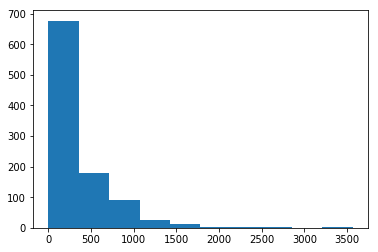

In [103]:
def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    # plot histogram of data 
    plt.hist(data) 

total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)

Analyze the average number of lessons completed by a student 



Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


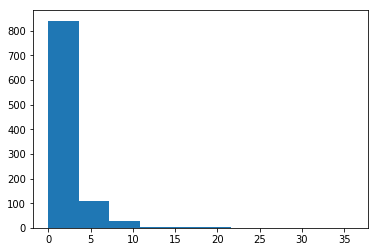

In [86]:
# group the engagement data by account
# sum up the total amount of lessons completed by each account key 

lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')

describe_data(lessons_completed_by_account.values())


Therefore, mean number of lessons completed by students is around 1.6 with a standard deviation of 3. The large standard deviation makes sense since students from different backgrounds are taking the course at different rates. 

#### Splitting out Passing Students

Number of visits in the first week 

A natural question is to find the average number of courses visited by each student. Apply the same method before? Add the total amount of courses visited for each student, then take the average. However, what if a student is taking multiple courses at the same time? 


A better question: 
We want to analyze the total number of days the student visited the classroom in a week, regardless of how many specific courses they visited that day. 

* change code in sum_grouped_items function 
* create a new field in the data calld "has_visited" which can be either a 1 or 0 where 1 = visited, 0 = not visited 

trying method 2, add a new "has_visited" field where we can call the old sum_grouped_item function and take the sum over the "has_visited" values :

We will add the "has_visited" field under the paid_enrollments table after i removed the free trial cancels.


Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


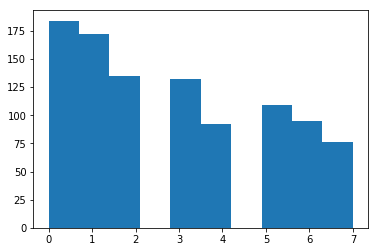

In [87]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0: 
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0 

days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')

describe_data(days_visited_by_account.values())

The average total number of days a student visits the classroom is around 3 days a week. 

Splitting Out Passing Students

Let's split the daily engagement table into two lists 

* students who passed the first project
* students who did not pass the first project

In [88]:
## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.


# Udacity's first project was subway_project which falls under two different keys
subway_project_lesson_keys = ['746169184', '3176718735']


#reminder of waht the submission data given was? 
paid_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

From double checking our submission data, we notice two important columns:

* assigned_rating field = check if student passed or not -- note PASSED and DISTINCTION both mean the student passed the subject

* lesson_key = check for the udacity subway project

In [89]:
# students who passed the subway projects 

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    # check if project was subway project  
    if project in subway_project_lesson_keys and (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])

# check how many unique students passed the subway project 
len(pass_subway_project)


647

In [90]:
# split data into passing vs non-passing projects 

# empty lists 
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    # check if account key is one that passed the subway project 
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
        
print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


#### Comparing the Two Student Groups

Comparing students who pass vs students who do not pass

possible metrics 
* minutes spent
* lessons completed
* days visited 
* other


non-passing students:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933
passing students:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


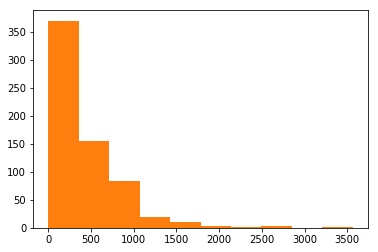

In [91]:
#MINUTES SPENT FOR PASSING VS NON PASSING STUDENTS

passing_engagement_by_account = group_data(passing_engagement, 'account_key')

non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')


print 'non-passing students:'
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
describe_data(non_passing_minutes.values())


print 'passing students:'
passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
describe_data(passing_minutes.values())



What do we notice?

* passing students spend more time in the classroom (395 minutes/week) compared to non-passing students (143 minutes/week)
* std for passing students is higher - since the mean is higher, it is expected for the std to be higher as well - also the more time students are spending, the easier it is to have more variations in the times
* maximum number of time spent in the classroom is higher for passing students 

non-passing students:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27
passing students:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


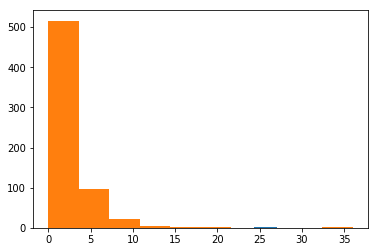

In [92]:
# LESSONS COMPLETED FOR PASSING VS NON PASSING STUDENTS

print 'non-passing students:'
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
describe_data(non_passing_lessons.values())


print 'passing students:'
passing_lessons = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
describe_data(passing_lessons.values())


What do we notice?

* passing students complete more lessons 
* average pace for passing student is 2 lessons/ week 
* maximum is higher for students who pass 


non-passing students:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7
passing students:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


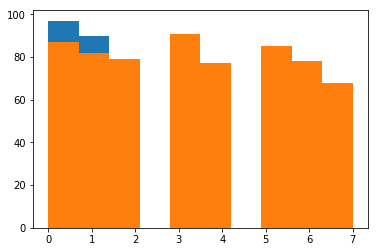

In [93]:
# DAYS VISITED FOR PASSING VS NON PASSING STUDENTS

print 'non-passing students:'
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')
describe_data(non_passing_visits.values())


print 'passing students:'
passing_visits = sum_grouped_items(passing_engagement_by_account, 'has_visited')
describe_data(passing_visits.values())


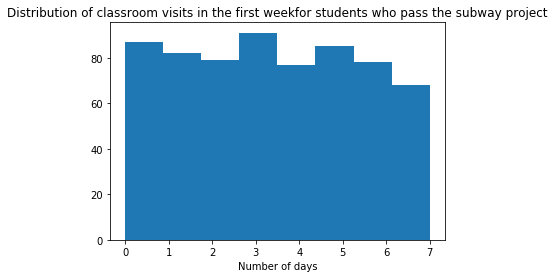

In [94]:
# 8 bins for 8 possibilities of days - from 0 to 7
plt.hist(passing_visits.values(), bins = 8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week'+ 
         'for students who pass the subway project')

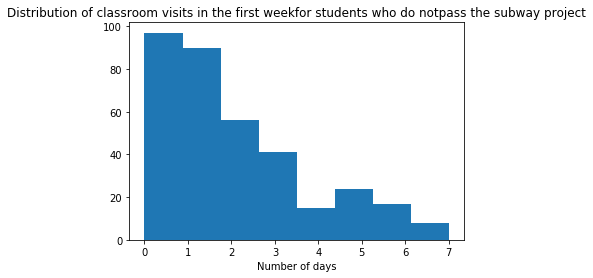

In [95]:
plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week'+ 
         'for students who do notpass the subway project')

What do we notice?
* For passing students, the number of days visited is higher 
* For both passing and non-passing students, the minimum and maximum days were the same 


#### Conclusions

The strongest trend noticable is that students who pass the subway project spend more minutes in the classroom the first week compared to students who do not pass. How do we know if the difference is a true difference, or a difference due to noise in the data? We would need to use statistics to check how likely it is that your results are due to chance, or how statistically significant the difference is. 

Interesting Findings 
* difference in total minutes --> report average minutes 
* difference in days visited --> show histograms 

It should be noted that correlation does not imply causation. For example, students who pass the first project is correlated to visit the clasroom multiple times in their first week. We can not say that students who visit the classroom multiple times in their first week causes them to pass their projects. It could be due to other factors. 
Example of possible factors include the level of interest. People who are not interested in data science will be less interested to pass the course. Udacity should recommend other courses to them. Another possible factor would be a lack of background knowledge. People who lack a programming background can fall behind and be not pass the course. Udacity can recommend an intro programming course as a prereq. 

In order to truly find out if there is a causation between two variables, we will need to run an A/B test. To make predictions with the data, machine learning and statistical inferences need to be added. For instance, given this data, can we predict which students are more likely to pass their first project? 


